In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Importing original data from csv files.

In [15]:
incidents = pd.read_csv("Louisville_Metro_KY_-_Fire_Incidents.csv")

prop_damage = pd.read_csv("Louisville_Metro_KY_-_Fire_Property_Damage.csv")

In [16]:
prop_damage.head()

,inci_no,Alm_Date,Address,Inci_type,Content_Loss,Property_Loss,Total_Loss,Pre_Inci_Value,Saved,ObjectId
0,17-0000034,2017/01/01 05:00:00+00,1551 W ORMSBY Louisville KY 40210,"100 - Fire, other",100.0,0.0,100,67320,67220,1
1,17-0000088,2017/01/01 05:00:00+00,1442 W SOUTHERN HEIGHTS Louisville KY 40215,"441 - Heat from short circuit (wiring), defect...",100.0,NaN,100,65000,64900,2
2,17-0000222,2017/01/02 05:00:00+00,3012 S 5th Louisville KY 40208,111 - Building fire,8000.0,56040.0,64040,56040,-8000,3
3,17-0000192,2017/01/02 05:00:00+00,3320 Bank Louisville KY 40212,131 - Passenger vehicle fire,NaN,4500.0,4500,5000,500,4
4,17-0000222,2017/01/02 05:00:00+00,3012 S 5th Louisville KY 40208,111 - Building fire,0.0,61000.0,61000,61000,0,5


Joining the original data to form the working dataframe.

In [17]:
merged_df = incidents.merge(prop_damage[['inci_no', 'Total_Loss', 'Saved']],
                            how='inner',
                            left_on='Inci_No',
                            right_on='inci_no')[['Inci_No', 'Station', 'Total_Loss', 'Saved']]

merged_df.drop_duplicates(subset=['Inci_No'], keep='first', inplace=True, ignore_index=True)
merged_df.head()

,Inci_No,Station,Total_Loss,Saved
0,17-0000034,Station 16,100,67220
1,17-0000088,Station 10,100,64900
2,17-0000222,Station 18,64040,-8000
3,17-0000192,Station 6,4500,500
4,17-0000455,Station 12,25000,365000


Cleaning the merged dataframe

In [18]:
merged_df['Saved'] = merged_df['Saved'].astype(str)

merged_df.loc[merged_df['Saved'].str.startswith('-'), 'Saved'] = '0'

merged_df['Saved'] = pd.to_numeric(merged_df['Saved'])

merged_df.head()

,Inci_No,Station,Total_Loss,Saved
0,17-0000034,Station 16,100,67220
1,17-0000088,Station 10,100,64900
2,17-0000222,Station 18,64040,0
3,17-0000192,Station 6,4500,500
4,17-0000455,Station 12,25000,365000


consider ordering by station

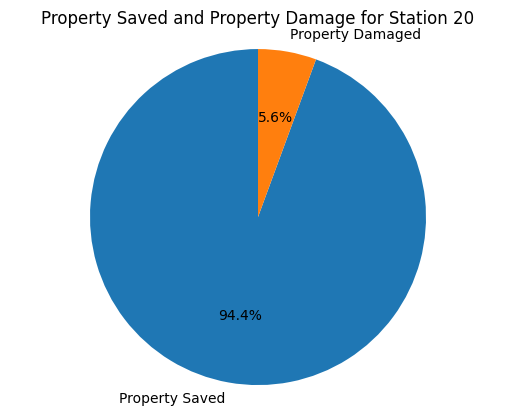

In [27]:
station_number = input("Enter the Station number 1 - 21: ")

station_key = "Station " + station_number

filtered_df = merged_df[merged_df['Station'] == station_key]

total_property_saved = filtered_df['Saved'].sum()
total_loss = filtered_df['Total_Loss'].sum()

labels = ['Property Saved', 'Property Damaged']
sizes = [total_property_saved, total_loss]
colors = ['#1f77b4', '#ff7f0e']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title(f"Property Saved and Property Damage for Station {station_number}")
plt.show()